Previsão de quantas unidades de um produto serão vendidas e qual o total monetário das vendas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing

In [2]:
dados = pd.read_csv(r"dados/dataset.csv")

In [3]:
dados.shape

(18, 6)

In [4]:
dados.columns

Index(['Ano', 'Periodo', 'Total_Vendas',
       'Percentual_Aumento_Vendas_Ano_Anterior', 'Total_Unidades_Vendidas',
       'Percentual_Aumento_Unidades_Ano_Anterior'],
      dtype='object')

In [5]:
dados.head(4)

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848


##### Pre processamento dos dados

In [6]:
# Extraindo a variável ano (variável de entrada)
array_ano = dados["Ano"].values.reshape(-1,1)

In [7]:
array_ano

array([[2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

In [8]:
type(array_ano)

numpy.ndarray

In [9]:
max_f = max(array_ano)
min_f = min(array_ano)
print(max_f)
print(min_f)

[2019]
[2002]


In [10]:
# Normalizando os dados
norm_features = preprocessing.minmax_scale(array_ano)
print(array_ano)

[[2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]


In [12]:
# var de saida
label = dados["Total_Vendas"]
label

0     19666.640
1     20384.980
2     20810.281
3     21184.427
4     21977.311
5     22580.893
6     22313.054
7     24124.309
8     25667.919
9     26617.490
10    27234.865
11    28029.747
12    28963.782
13    29415.865
14    30790.906
15    32009.092
16    33370.630
17    34700.115
Name: Total_Vendas, dtype: float64

In [13]:
max_l = max(label)
min_l = min(label)
print(max_l)
print(min_l)

34700.115
19666.64


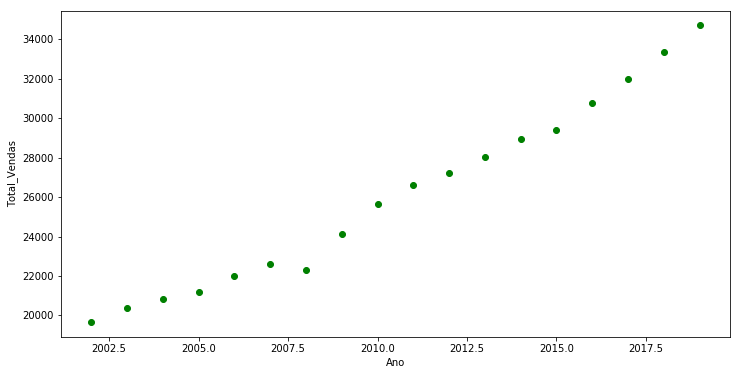

In [15]:
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'green')
plt.ylabel("Total_Vendas")
plt.xlabel("Ano")
plt.show()

In [16]:
# Normaliza tb o label
norm_label = preprocessing.minmax_scale(label)
print(norm_label)

[0.         0.0477827  0.07607296 0.10096049 0.15370172 0.19385092
 0.17603475 0.29651621 0.3991944  0.46235817 0.50342486 0.55629899
 0.61842934 0.6485011  0.73996638 0.82099794 0.91156502 1.        ]


In [35]:
# split dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(norm_features, 
                                                        norm_label, 
                                                        test_size = 0.075,
                                                        random_state = 3)

### Modelo Single Output Regression

In [36]:
modelo_single_output = linear_model.LinearRegression()

In [37]:
modelo_single_output.fit(x_treino, y_treino)

LinearRegression()

In [29]:
# Anos para previsão
anos = [2020,2021,2022,2023,2024,2025]

2020
[0.98805448]
[34520.53236724]
2021
[1.04707872]
[35407.87182586]
2022
[1.10610297]
[36295.21128448]
2023
[1.16512721]
[37182.5507431]
2024
[1.22415145]
[38069.89020172]
2025
[1.28317569]
[38957.22966034]


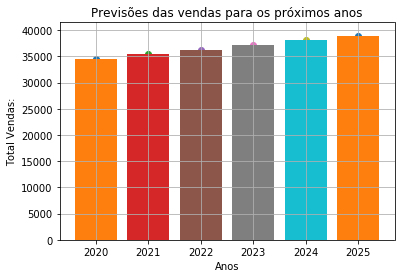

In [46]:
for i in anos:  
    
    x = i
    print(x)
    
    # Normalizando os dados, pq o modelo foi c dados normalizados.
    scaled_x = float((x - min_f) / (max_f - min_f))
    
    # Extrai o coeficiente do valor previsto
    coef = modelo_single_output.predict([[scaled_x]])
    print(coef)
    
    # Calcula a previsão desfazendo a normalização
    pred = coef * (max_l - min_l) + min_l
    y = pred
    print(y)
    
    # Plot
    plt.scatter(x, y)
    plt.bar(x, pred)
    plt.ylabel('Total Vendas:')
    plt.xlabel('Anos')
    plt.grid(True)
    plt.title('Previsões das vendas para os próximos anos')

In [47]:
# Extrai as previsões do modelo
y_pred = modelo_single_output.predict(x_teste)

In [48]:
# Calcula a performance do modelo
df = pd.DataFrame({'Total Vendas Real':y_teste, 'Total Vendas Previsão':y_pred})
print("Valor Real x Valor Previsto:\n\n", df)

Valor Real x Valor Previsto:

    Total Vendas Real  Total Vendas Previsão
0           0.556299               0.574885
1           0.076073               0.043667


In [49]:
score = modelo_single_output.score(x_teste, y_teste)

In [50]:
print("Precisão do Modelo:",(score * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Precisão do Modelo: 98.78967908950257
Mean Absolute Error: 0.025496072185115272
Mean Squared Error: 0.0006978015610769276
Root Mean Squared Error: 0.026415933848284213
